In [50]:
# CIFAR-10 데이터셋 : 10가지 컬러 이미지
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
# 6만장 (학습용 5만장, 검증용 1만장)
# 32x32 이미지
# 32x32x3 RGB 컬러 이미지
# http://www.cs.toronto.edu/~kriz/cifar.html

from tensorflow.keras import datasets, utils

def make_data():
    # 다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()
    # 원핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)

    # 데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train,y_train), (X_test,y_test)

In [51]:
X_train.shape

(50000, 32, 32, 3)

In [52]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Activation,Flatten, Dropout

def make_model():
    model = Sequential()
    # padding = "same" 출력 크기를 입력크기과 같게 유지
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(32,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # 학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [53]:
a = isinstance(1, int) # True
b = isinstance(1.2, float) # True

In [54]:
def plot_loss(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history=history.history

    plt.plot(history["loss"])
    plt.plot(history["val_loss"])

    #타이틀이 설정되어 있지 않으면

    if title is not None:
        plt.title(title)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["Train","Test"],loc=0)
    

In [55]:
def plot_acc(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    # 타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylable("accuracy")
    plt.xlable("epoch")
    plt.legend(["Train", "Test"], loc=0)
    

In [56]:
(X_train,y_train),(X_test,y_test)=make_data()

In [57]:
X_train.shape

(50000, 32, 32, 3)

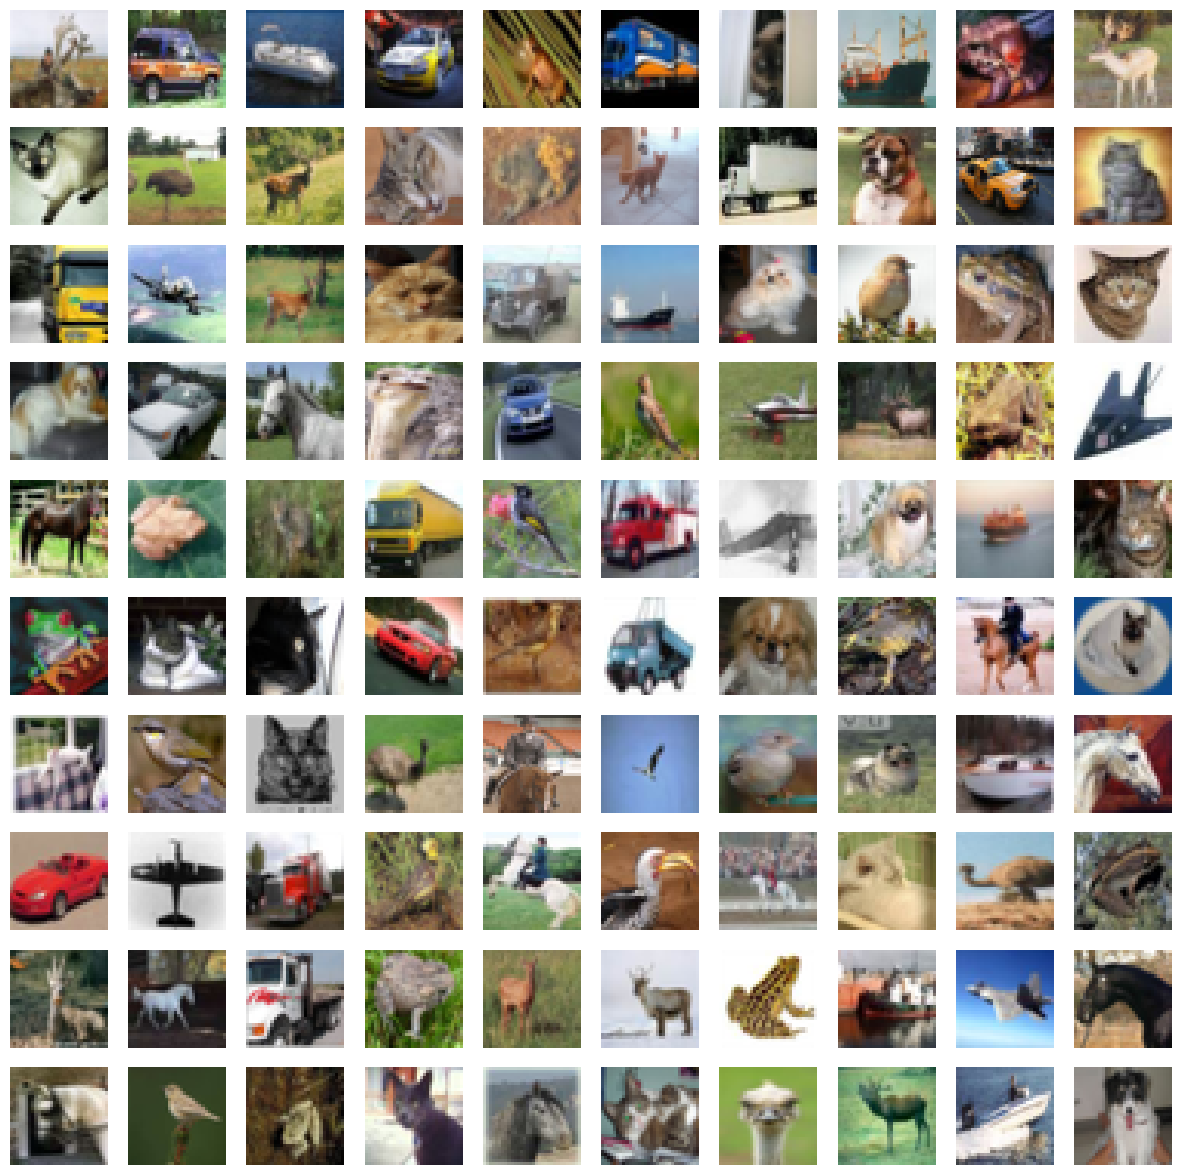

In [58]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes1=plt.subplots(10,10,figsize=(15,15))

for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [59]:
# 모델 생성

model=make_model()

In [60]:
# 학습 시간이 오래 걸림

import tensorflow as tf

with tf.device('/GPU:0'):
    # validation_split : validation 비율
    history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 64s 51ms/step - loss: 1.7848 - accuracy: 0.3570 - val_loss: 1.5240 - val_accuracy: 0.4709
Epoch 2/3
1250/1250 [==============================] - 62s 49ms/step - loss: 1.4415 - accuracy: 0.4846 - val_loss: 1.3490 - val_accuracy: 0.5257
Epoch 3/3
1250/1250 [==============================] - 64s 51ms/step - loss: 1.3095 - accuracy: 0.5332 - val_loss: 1.2452 - val_accuracy: 0.5669


In [61]:
# 성능 평가

performance_test=model.evaluate(X_test,y_test,batch_size=128)
print(performance_test)

79/79 [==============================] - 2s 21ms/step - loss: 1.2395 - accuracy: 0.5650
[1.2394975423812866, 0.5649999976158142]


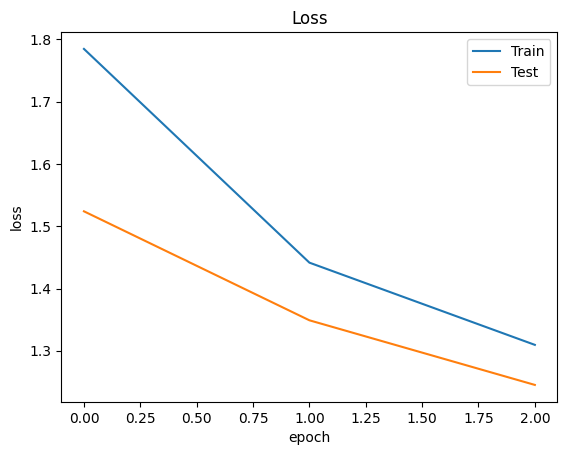

In [62]:
import matplotlib.pyplot as plt

plot_loss(history, 'Loss')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

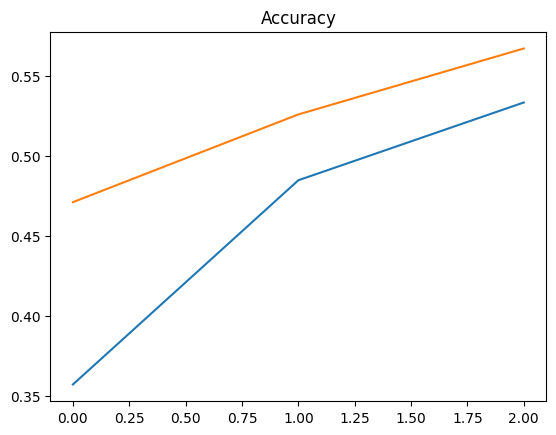

In [63]:
plot_acc(history, 'Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test,verbose=1)

y_pred=np.argmax(y_pred, axis=1)

confusion_matrix(np.argmax(y_test,axis=1),y_pred)

In [ ]:
model.save('c:/data/cifar/cifar.h5')